![image.png](attachment:image.png)


## What am I even doing
1. Plot graphs of rainbow elevation (epsilon) against angle of incidence (theta (alpha for me) )
2. Plot graphs of rainbow elevation (epsilon) against frequency of light. Use the emperical model of n vs f for water
3. Recreate the figure below
![image.png](attachment:image.png)
![image-2.png](attachment:image-2.png)
![image-3.png](attachment:image-3.png)

### Pseudocode/Orders of Business
- plotting the graph of primary rainbow elevation
- calculating secondary ray deviation (by hand)
- plotting graph of secondary rainbow elevation (on same plot)
- attribute colours to each plot (plot for red, purple, blue in a gradiented way -- mess about with defining the rbg colour dependent on the frequency of the light and then working from there)
- improve the code

### Sources
https://en.wikipedia.org/wiki/Rainbow

 <!-- Will need to understand this fully before progression, potentially finding further sources from this. Problem solving, however, should be the most efficient way of progression-->

https://isaacphysics.org/questions/prism_deviations_sym

https://isaacphysics.org/questions/maths_ch7_8_q1


# ADD COLOURS TO THE GRAPHS DEPENDING ON THE FREQUENCY (SPEND MORE TIME ON THE VISUAL ELEMENT)

# CHALLENGE 11A

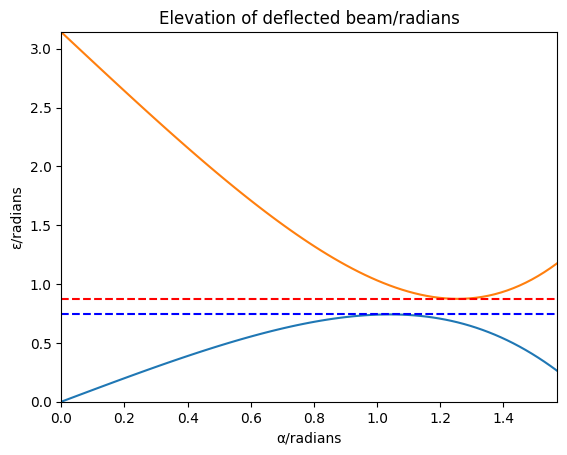

In [ ]:
# import modules
import numpy as np
import matplotlib.pyplot as plt

# constants
n = 1
n_water = 1.33

# angles
alpha_deg = np.linspace(0, 100, 90) # incident rays in degrees
alpha = [np.radians(i) for i in alpha_deg]
beta = [np.arcsin(((n)*(np.sin(i)))/(n_water)) for i in alpha] # convert degrees to radians

epsilon_primary = []
for i in range(len(alpha_deg)):
    epsilon_primary.append((4 * beta[i]) - (2 * alpha[i]))

# turning point (verification)
## I hand calculated the turning point for this: d(epsilon_primary)/d(alpha)
alpha_zero = np.arcsin(((4 - (n_water)**2)/(3))**0.5) # alpha at critical point (1)
## when alpha zero:
## y_value is at the critical point.
critical_y_primary = (4 * (np.arcsin(((n)*(np.sin(alpha_zero)))/(n_water)))) - 2 * (alpha_zero)

# secondary rainbow
epsilon_secondary = []
for i in range(len(alpha_deg)):
    epsilon_secondary.append((np.pi) - (6 * (np.arcsin((np.sin(alpha[i]))/(n_water)))) + (2 * alpha[i]))

alpha_zero_secondary = np.arcsin(np.sqrt((9 - (n_water)**2)/(8)))
critical_y_secondary = (np.pi) - (6 * (np.arcsin((np.sin(alpha_zero_secondary))/(n_water)))) + (2 * alpha_zero_secondary)

# plotting
## primary & secondary
plt.plot((alpha), (epsilon_primary)) # primary
plt.plot((alpha), (epsilon_secondary)) # secondary

## turning point {where the rainbows are seen?}
plt.hlines(y=[critical_y_primary, critical_y_secondary], xmin=0, xmax=5, colors=['b', 'r'], linestyles=['--', '--'])

## labelling
plt.ylabel("ε/radians")
plt.xlabel("α/radians")
plt.title("Elevation of deflected beam/radians")
plt.xlim(0, np.radians(90))
plt.ylim(0, np.radians(180))
plt.show()

# CHALLENGE 11B
Plot graphs of rainbow elevation against the frequency of light. Use the empirical model of n against f for water.

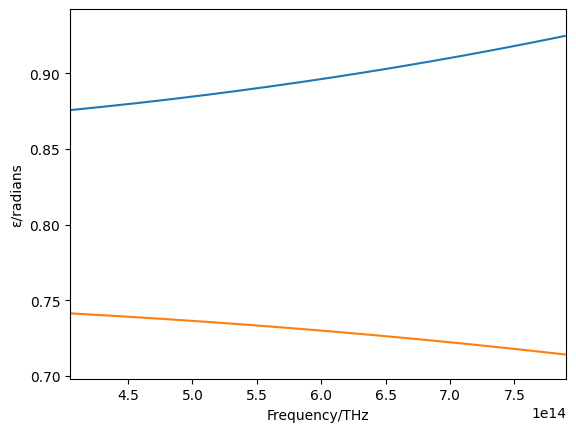

In [ ]:
# import modules
import numpy as np
import matplotlib.pyplot as plt

# empirical model equation
frequency = [i*10**12 for i in range(405, 790, 1)] # metres
refractive_index = [np.sqrt(1 + (np.sqrt(1 / (1.731 - 0.261 * (freq*10**-15)**2)))) for freq in frequency]

## primary rainbow
theta_1 = [np.arcsin(np.sqrt((4-(n**2))/(3))) for n in refractive_index]
epsilon_1 = []
for i in range(len(frequency)):
    epsilon_1.append(4 * (np.arcsin(np.sin(theta_1[i]) / refractive_index[i])) - 2 * theta_1[i])

## secondary rainbow
theta_2 = [np.arcsin(np.sqrt((9 - n**2)/(8))) for n in refractive_index]
epsilon_2 = []
for i in range(len(frequency)):
    epsilon_2.append(np.pi - (6 * np.arcsin((np.sin(theta_2[i])) / refractive_index[i])) + 2 * (theta_2[i]))

# remember to convert to degrees later on

# plotting
### get the colours for each of the sections
ax = plt.gca()
ax.set(xlim=[405*10**12, 790*10**12], ylim=np.radians([40, 54]))
plt.plot(frequency, (epsilon_2))
plt.plot(frequency, (epsilon_1))
plt.xlabel("Frequency/THz") # to change to make it read like terahertz
plt.ylabel("ε/radians")
plt.show()

# CHALLENGE 11C
![image.png](attachment:image.png)


The loss of each of the rays is the input angle minus the emergent ray: ($\theta - \epsilon$).

The graph requires this difference to be for when these input angles are used:
- critical angle (black line)
- primary rainbow (red line)
- secondary rainbow (blue line)

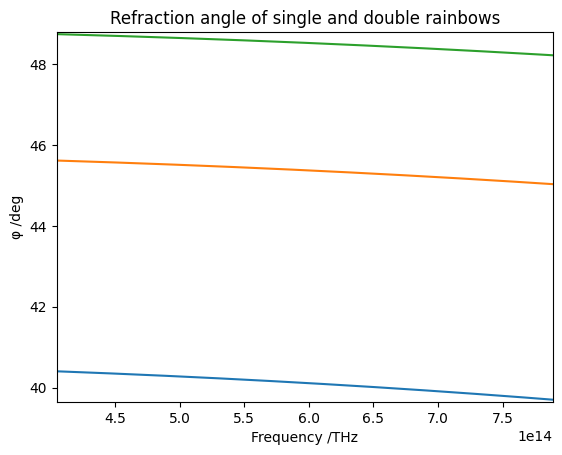

In [ ]:
### sin(theta) = n * sin(phi)

# import modules
import numpy as np
import matplotlib.pyplot as plt

# empirical model equation
frequency = [i*10**12 for i in range(405, 790, 1)] # metres
refractive_index = [np.sqrt(1 + (np.sqrt(1 / (1.731 - 0.261 * (freq*10**-15)**2)))) for freq in frequency]

## primary rainbow
theta_1 = [np.arcsin(np.sqrt((4-(n**2))/(3))) for n in refractive_index]
phi_1 = []
for i in range(len(frequency)):
    phi_1.append(np.arcsin((np.sin(theta_1[i]))/(refractive_index[i])))

## secondary rainbow
theta_2 = [np.arcsin(np.sqrt((9-(n**2))/(8))) for n in refractive_index]
phi_2 = []
for i in range(len(frequency)):
    phi_2.append(np.arcsin((np.sin(theta_2[i]))/(refractive_index[i])))

## critical angle
theta_c = [np.arcsin(1/n) for n in refractive_index]

plt.plot(frequency, np.degrees(phi_1))
plt.plot(frequency, np.degrees(phi_2))
plt.plot(frequency, np.degrees(theta_c))

plt.ylim(np.degrees(min(phi_1))-0.05, np.degrees(max(theta_c))+0.05)
plt.xlim(min(frequency), max(frequency))

plt.xlabel("Frequency /THz")
plt.ylabel("\u03C6 /deg")
plt.title("Refraction angle of single and double rainbows")

plt.show()

# CHALLENGE 11D
Create a model of primary and secondary rainbows that you would see at sea level (with no topographic obstructions) for different angles of (anti) solar elevation.
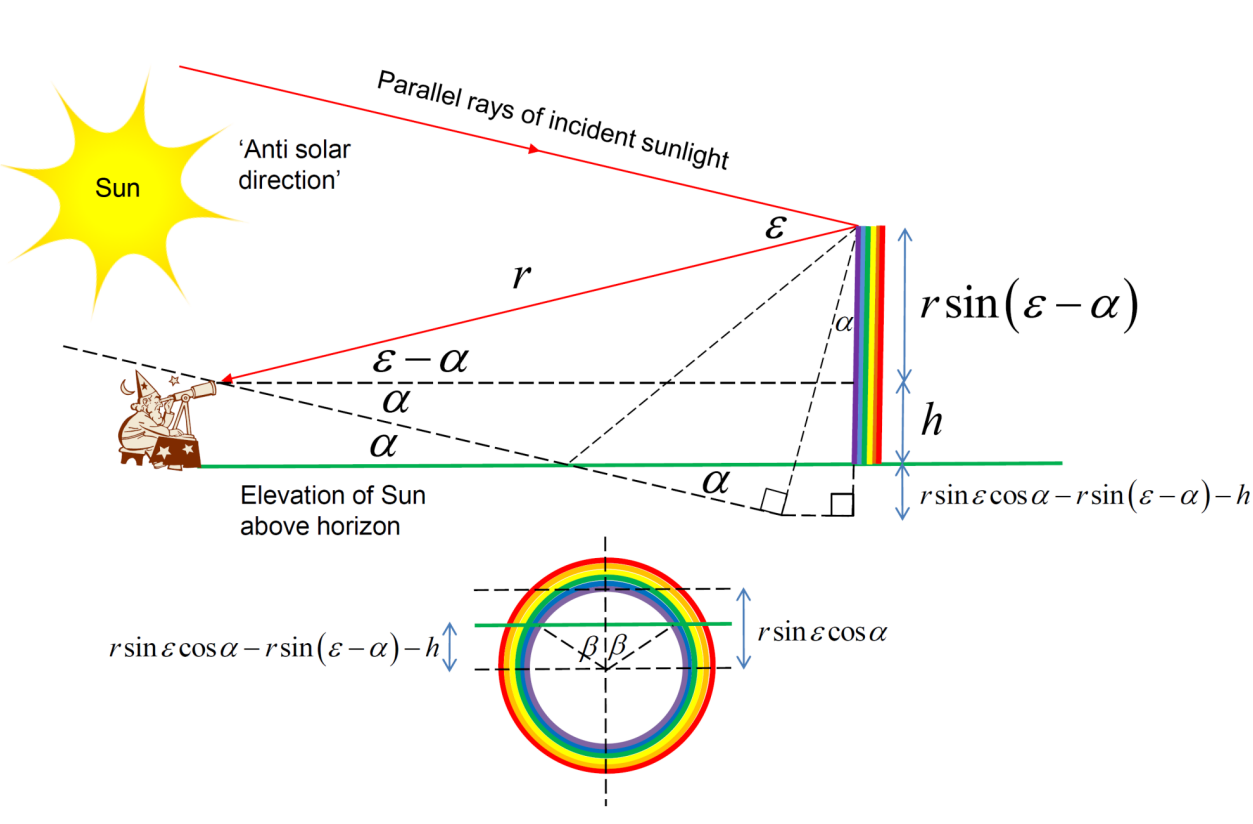

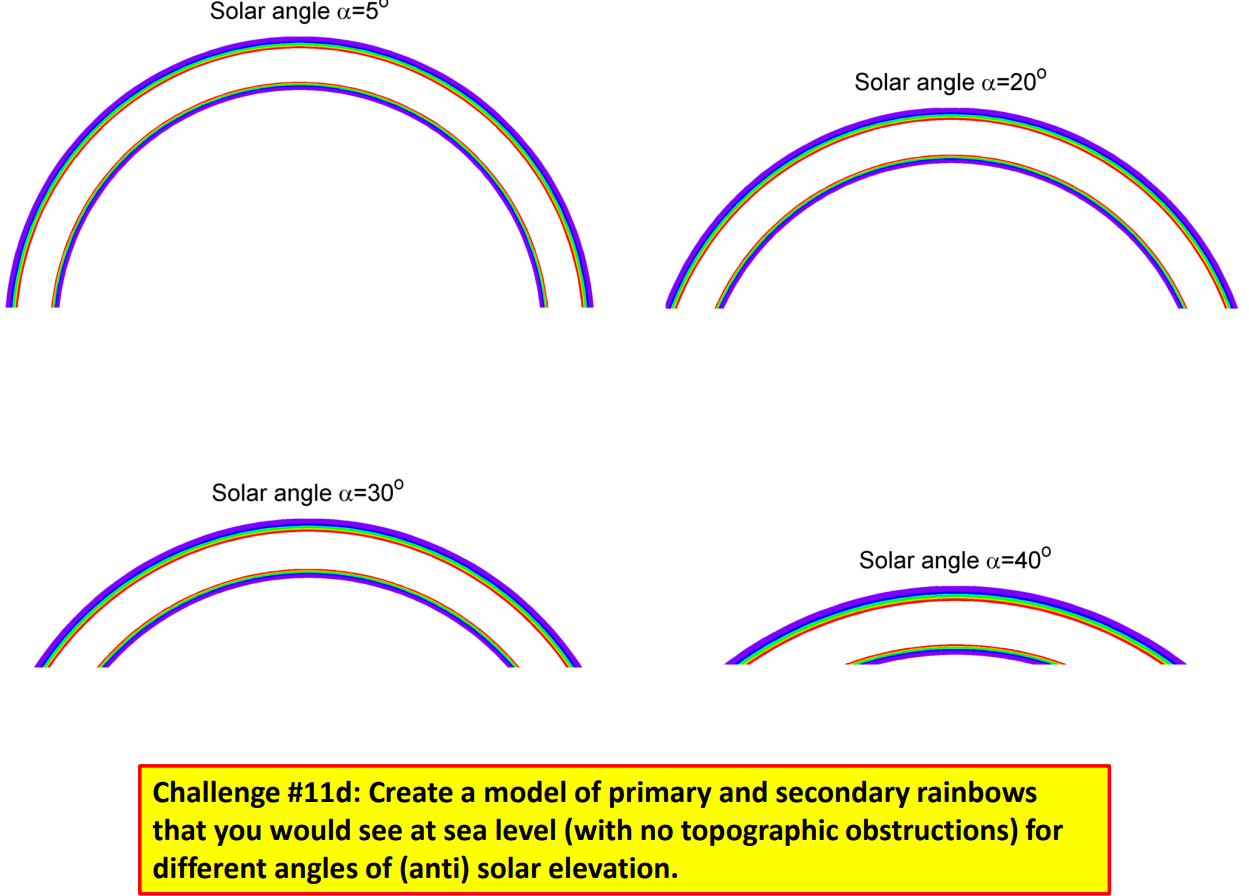

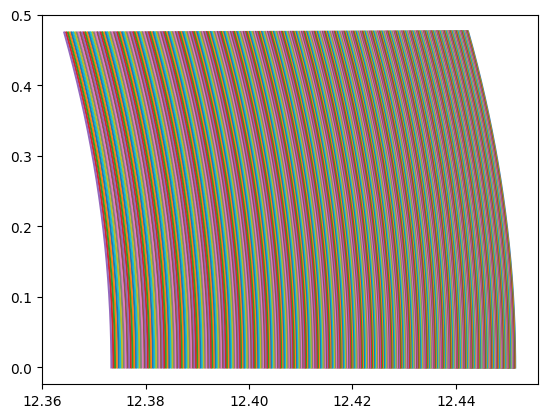

In [13]:
"""
NOTES:
- All angles are in degrees
"""
# import modules
import numpy as np
import matplotlib.pyplot as plt

# primary

## constants
n = 1
n_water = 1.33
solar_angle = 5 # later make this an iterable list/slider to show this moving dynamically
r = 50 # distance from viewer to top of rainbow

# empirical model equation
frequency = [i*10**12 for i in range(405, 790, 1)] # metres
refractive_index = [np.sqrt(1 + (np.sqrt(1 / (1.731 - 0.261 * (freq*10**-15)**2)))) for freq in frequency]

## primary rainbow
theta_1 = [np.arcsin(np.sqrt((4-(n**2))/(3))) for n in refractive_index]
epsilon_1 = []
for i in range(len(frequency)):
    epsilon_1.append(4 * (np.arcsin(np.sin(theta_1[i]) / refractive_index[i])) - 2 * theta_1[i])

## diameter
h = 0 # since at sea level
total_diameter = (r * np.sin((epsilon_1)) * np.cos((epsilon_1)))

visible = r * np.sin(np.degrees(epsilon_1) - solar_angle) # this is what is seen by the observer

## cartesian equation from the radius of the total diameter
real_radius = total_diameter / 2
x = np.linspace(real_radius - 0.00912, real_radius, 1000)
y_plus = np.sqrt(real_radius**2 - x**2)
y_minus = -np.sqrt(real_radius**2 - x**2)


# plot
plt.plot(x, y_plus)


plt.show()

# secondary (to do later)